In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [22]:
Data=pd.read_csv("DataInput.csv")
Data

,Unnamed: 0,NTA_name,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,0,Allerton-Pelham Gardens,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.400000,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.000000,11
1,1,Annadale-Huguenot-Prince's Bay-Eltingville,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.190000,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.000000,44
2,2,Arden Heights,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.290000,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.000000,26
3,3,Astoria,13.8,15.506,25.4,42.560,84.144,26.334,15.276,15.350000,...,10.254995,1.703561,1.381475,28.444418,11.113890,11.248415,3.161353,3.930995,0.000000,5
4,4,Auburndale,5.3,3.374,5.4,47.530,85.116,36.186,68.084,44.750000,...,7.944284,1.008646,1.176753,18.986551,8.659942,12.420749,4.111431,3.770413,0.000000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,174,Windsor Terrace,12.2,7.222,24.3,22.130,90.972,12.928,42.460,11.193333,...,18.820617,3.938780,1.778078,36.394328,5.572811,8.854378,1.093856,2.363268,0.000000,10
175,175,Woodhaven,13.1,20.202,25.5,47.442,76.268,28.784,51.268,23.710000,...,2.918009,0.674005,0.273463,11.815203,13.898347,11.274712,4.463879,6.217258,0.020912,6
176,176,Woodlawn-Wakefield,28.6,21.162,25.4,42.000,82.792,7.640,46.608,3.670000,...,5.181218,0.322266,0.313188,16.592152,12.645530,10.142296,3.456415,4.577537,0.000000,9
177,177,Woodside,10.4,20.604,26.6,58.000,78.168,40.624,32.634,38.970000,...,5.991805,1.120330,0.414130,15.462300,11.545503,10.209390,3.177901,9.110856,0.000000,5


In [23]:
Data.drop(columns=['Unnamed: 0'], inplace=True)

In [24]:
clmns = list(Data.columns)
clmns.remove('NTA_name') 
Data[clmns] = Data[clmns].apply(pd.to_numeric, errors='coerce')
Data.shape

(179, 63)

In [38]:
Data

,NTA_name,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,Percent Black Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,Allerton-Pelham Gardens,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.400000,32.406667,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.000000,11
1,Annadale-Huguenot-Prince's Bay-Eltingville,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.190000,0.560000,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.000000,44
2,Arden Heights,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.290000,1.603333,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.000000,26
3,Astoria,13.8,15.506,25.4,42.560,84.144,26.334,15.276,15.350000,4.183333,...,10.254995,1.703561,1.381475,28.444418,11.113890,11.248415,3.161353,3.930995,0.000000,5
4,Auburndale,5.3,3.374,5.4,47.530,85.116,36.186,68.084,44.750000,1.150000,...,7.944284,1.008646,1.176753,18.986551,8.659942,12.420749,4.111431,3.770413,0.000000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Windsor Terrace,12.2,7.222,24.3,22.130,90.972,12.928,42.460,11.193333,5.036667,...,18.820617,3.938780,1.778078,36.394328,5.572811,8.854378,1.093856,2.363268,0.000000,10
175,Woodhaven,13.1,20.202,25.5,47.442,76.268,28.784,51.268,23.710000,4.173333,...,2.918009,0.674005,0.273463,11.815203,13.898347,11.274712,4.463879,6.217258,0.020912,6
176,Woodlawn-Wakefield,28.6,21.162,25.4,42.000,82.792,7.640,46.608,3.670000,59.723333,...,5.181218,0.322266,0.313188,16.592152,12.645530,10.142296,3.456415,4.577537,0.000000,9
177,Woodside,10.4,20.604,26.6,58.000,78.168,40.624,32.634,38.970000,1.176667,...,5.991805,1.120330,0.414130,15.462300,11.545503,10.209390,3.177901,9.110856,0.000000,5


In [26]:
x = Data.iloc[:,2:]

In [27]:
y = Data.iloc[:, [1]]

In [28]:
Data=Data.dropna()
# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=999)
X_train.shape

(125, 61)

In [29]:
X_test.shape

(54, 61)

In [36]:
dr = DecisionTreeRegressor(max_depth=3)
dr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dr.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
43,Number of persons 25+ yrs in 11th grade,0.694879
24,"Families with income < $10,000",0.199821
37,"Families with income between $125,000-$149,999",0.0451447
7,Percent Black Alone,0.0439314
8,Percent Hispanic Alone,0.00843204


In [39]:
only_import = ['Number of persons 25+ yrs in 11th grade','Percent Black Alone','tree_dbh']

In [40]:
X_train_only_import_var = X_train[only_import]
X_test_only_import_var = X_test[only_import]
X_train_only_import_var.head(3)

,Number of persons 25+ yrs in 11th grade,Percent Black Alone,tree_dbh
89,0.120004,4.076667,2
155,1.984973,3.216667,5
139,1.409507,9.126667,10


In [41]:
dr.fit(X_train_only_import_var, y_train)
print('In sample accuracy:',dr.score(X_train_only_import_var,y_train))
print('Out of sample accuracy:',dr.score(X_test_only_import_var,y_test))

In sample accuracy: 0.8169742871272855
Out of sample accuracy: 0.8547772063765305


In [42]:
from sklearn import tree
import pydotplus
from IPython.display import Image  
print(tree.export_graphviz(dr,out_file=None,
                         feature_names=X_train_only_import_var.columns.values,  
                         class_names=['no buy','buy'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

thestring = tree.export_graphviz(dr, out_file=None,  
                         feature_names=X_train_only_import_var.columns.values, 
                         class_names=['no buy','buy'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
graph.write_png('DecisionTree.png')

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Number of persons 25+ yrs in 11th grade <= 1.511, samples = 125, value = 23.663", fillcolor="#f8ddc9"] ;
1 [label="Percent Black Alone <= 7.975, samples = 77, value = 13.251", fillcolor="#fcf1e9"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Number of persons 25+ yrs in 11th grade <= 0.397, samples = 52, value = 10.321", fillcolor="#fdf7f2"] ;
1 -> 2 ;
3 [label="samples = 11, value = 6.3", fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label="samples = 41, value = 11.4", fillcolor="#fdf5ef"] ;
2 -> 4 ;
5 [label="tree_dbh <= 5.5, samples = 25, value = 19.344", fillcolor="#fae5d6"] ;
1 -> 5 ;
6 [label="samples = 6, value = 23.333", fillcolor="#f8ddca"] ;
5 -> 6 ;
7 [label="samples = 19, value = 18.084", fillcolor="#fae8da"] ;
5 -> 7 ;
8 [label="Number of persons 25+ yrs in 11th grade <= 2.645, samples = 48, value = 40.367", fillcolor="#f1bc9

True

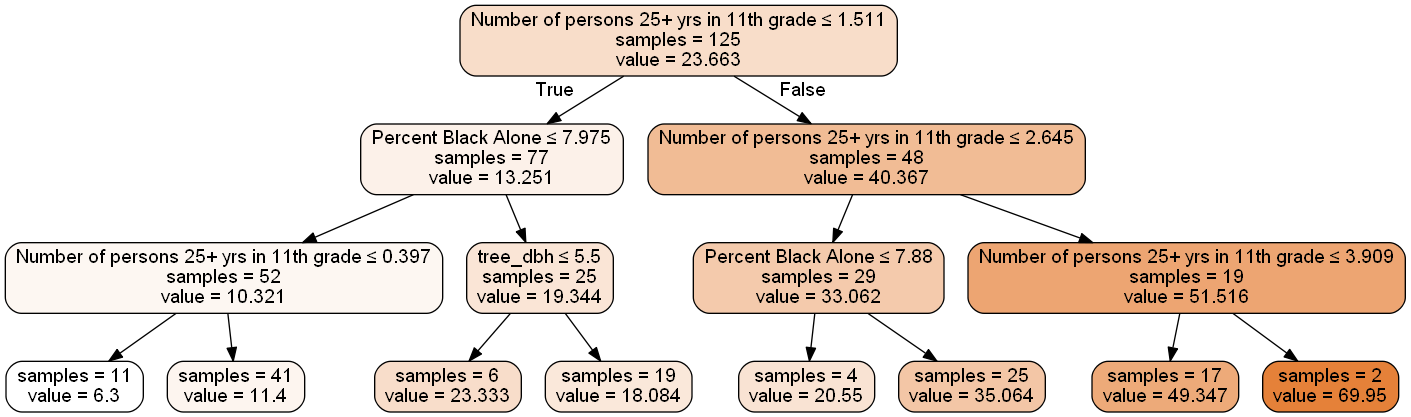

In [43]:
Image(graph.create_png()) 